In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [2]:

df = pd.read_csv('indo_cleaned.csv')

Mean Squared Error: 103.94055356059191
R-squared: 0.13884292414129895


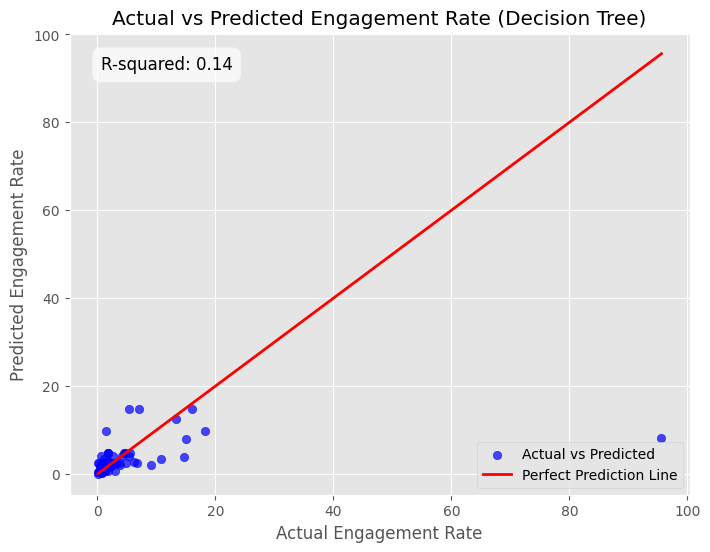

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataframe is named `df`
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model
model = DecisionTreeRegressor(max_depth=7, 
                              min_samples_split=9,  
                              min_samples_leaf=2,                # Limit tree depth
       # Minimum samples in leaf nodes
    random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs Predicted')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R-squared: {r2:.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate (Decision Tree)')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Mean Squared Error: 75.91077922264468
R-squared: 0.3710721905726604


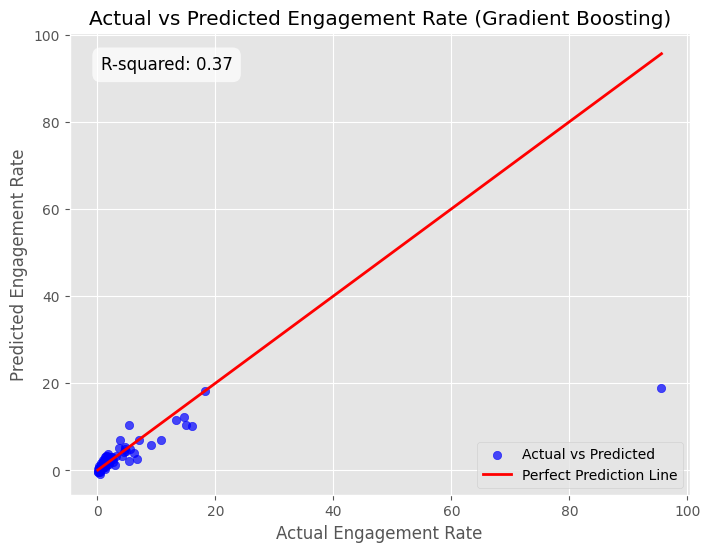

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming your dataframe is named `df`
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GradientBoostingRegressor model
model = GradientBoostingRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to tune parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and train the model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs Predicted')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R-squared: {r2:.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate (Gradient Boosting)')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 103.09949726575
R-squared: 0.14581115314035265


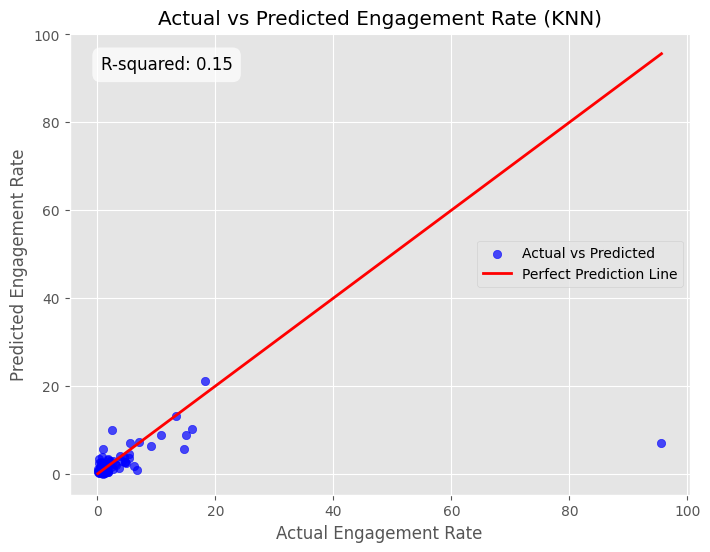

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataframe is named `df`
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model
model = KNeighborsRegressor(n_neighbors=1)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs Predicted')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R-squared: {r2:.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate (KNN)')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 112.51525778445883
R-squared: 0.06780070853991771


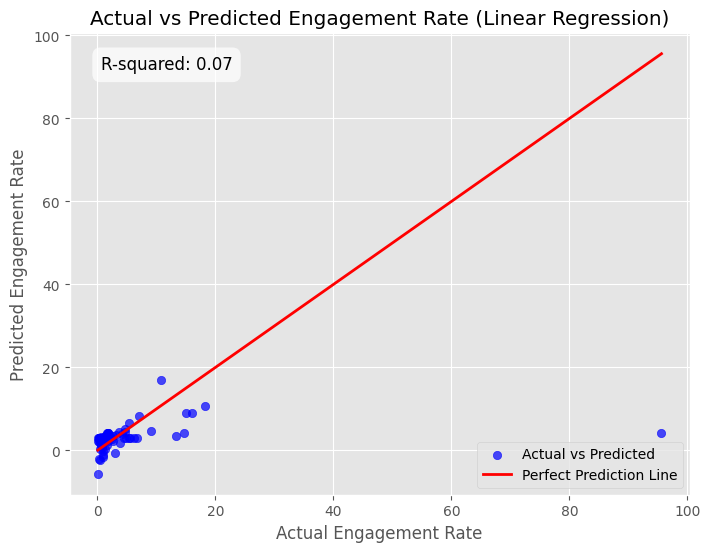

In [26]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataframe is named `df`
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2}')

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs Predicted')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R-squared: {r2:.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate (Linear Regression)')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 98.9086514858526
R-squared: 0.1805326970764004


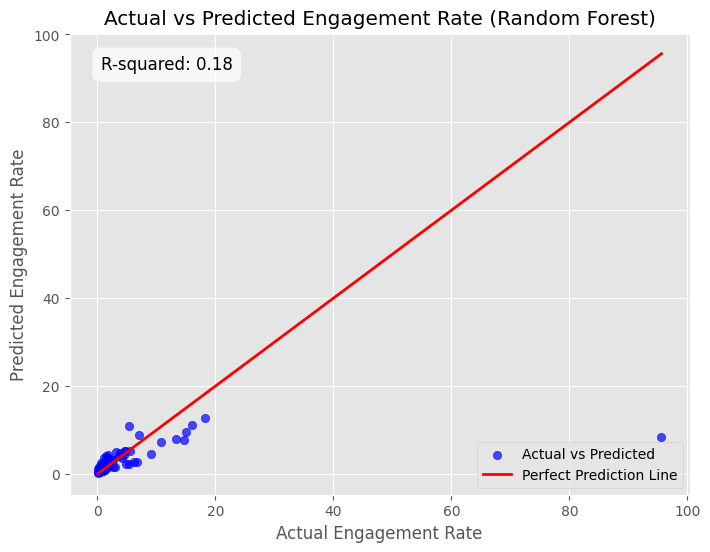

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataframe is named `df`
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs Predicted')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R-squared: {r2:.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate (Random Forest)')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 93.77508152874675
R-squared: 0.2230647977968402


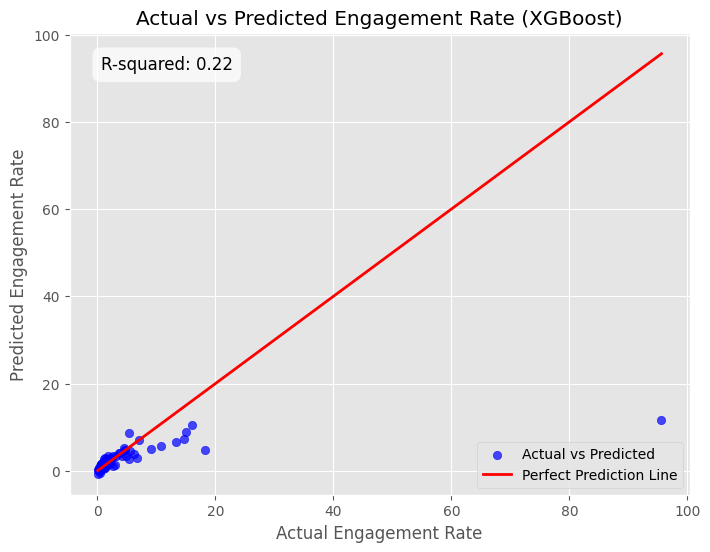

In [28]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataframe is named `df`
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=350,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.7,
    colsample_bytree=1
)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs Predicted')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R-squared: {r2:.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate (XGBoost)')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()